# Stability of uniform firing rate distribution

$$\lambda_{max} = \frac{D}{D-1} \bigg[ A\Lambda_2 \left(D, \frac{\mu_0 - \mu_1}{\sqrt{D}} + \sqrt{D}\mu_1, \sqrt{\frac{\sigma_0^2-\sigma_1^2}{D} + \sigma_1^2} \right) 
    + B\Lambda_1 \left(D, \frac{\mu_0 - \mu_1}{\sqrt{D}} + \sqrt{D}\mu_1, \sqrt{\frac{\sigma_0^2 -\sigma_1^2}{D} + \sigma_1^2} \right) + C/D \bigg]$$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from disp import set_plot


DX = .01
X_MIN, X_MAX = -200, 200
X = np.linspace(X_MIN, X_MAX, int((X_MAX-X_MIN)/DX)+1)

def norm(x, mu, sgm):
    return stats.norm.pdf(x, loc=mu, scale=sgm)

def phi(x, mu, sgm):
    return stats.norm.cdf(x, loc=mu, scale=sgm)

def lam_2(D, mu, sgm):
    return DX*np.sum(X**2*norm(X, mu, sgm)*phi(X, mu, sgm)**(D-1))

def lam_1(D, mu, sgm):
    return DX*np.sum(X*norm(X, mu, sgm)*phi(X, mu, sgm)**(D-1))

def get_lam_max(D, mu_0, mu_1, sgm_0, sgm_1):
    a = np.sqrt(D)*(mu_0 - mu_1)
    b = np.sqrt(D)*mu_1
    c = sgm_0**2 - sgm_1**2
    d = sgm_1**2
    
    mu_star = a/D + b
    v_star = c/D + d
    
    aa = c/(2*(c/D + d)**2)
    bb = (a*d - b*c)/(c/D + d)**2
    cc = (b**2*c - a**2*c/D**2 - 2*a**2*d/D - 2*a*b*d - c**2/D - c*d)/(2*(c/D + d)**2)
    
    return D/(D-1) * (aa * lam_2(D, mu_star, np.sqrt(v_star)) + bb * lam_1(D, mu_star, np.sqrt(v_star)) + cc/D)

In [2]:
# lam max vs D for diff param sets
DS = np.arange(2, 40)
mu_0_mu_1_sgm_0_sgm_1s = [
    # mean-driven
    (0, 0, 1, 1),
    (1, 0, 1, 1),
    (2, 0, 1, 1),
    (3, 0, 1, 1),
    
    # fluctuation-driven
    (0, 0, 1, 1),
    (0, 0, 5, 1),
    (0, 0, 10, 1),
    (0, 0, 10, 0),
]

lam_maxs_all = []

for mu_0, mu_1, sgm_0, sgm_1 in mu_0_mu_1_sgm_0_sgm_1s:
    lam_maxs = np.nan * np.zeros(len(DS))
    
    for cD, D in enumerate(DS):
        lam_maxs[cD] = get_lam_max(D, mu_0, mu_1, sgm_0, sgm_1)
        
    lam_maxs_all.append(lam_maxs)

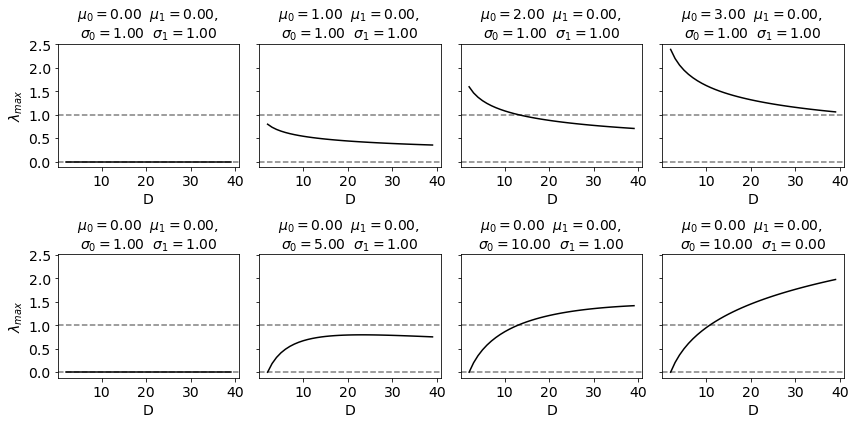

In [3]:
fig, axs = plt.subplots(2, 4, figsize=(12, 6), tight_layout=True, sharey=True)

for ax, lam_maxs, (mu_0, mu_1, sgm_0, sgm_1) in zip(axs.flat, lam_maxs_all, mu_0_mu_1_sgm_0_sgm_1s):
    
    ax.axhline(0, color='gray', ls='--')
    ax.axhline(1, color='gray', ls='--')
    ax.plot(DS, lam_maxs, lw=1.5, c='k')
    
    title = r'$\mu_0 =$' + f'{mu_0:.2f}' + r'  $\mu_1 =$' + f'{mu_1:.2f}, \n' + \
        r'$\sigma_0 =$' + f'{sgm_0:.2f}' + r'  $\sigma_1 =$' + f'{sgm_1:.2f}'
    set_plot(ax, x_label='D', title=title, font_size=14)
    
for ax in axs[:, 0]:
    set_plot(ax, y_label=r'$\lambda_{max}$', font_size=14)

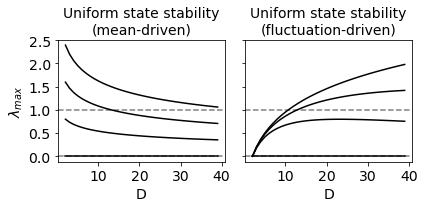

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3), tight_layout=True, sharey=True)

for lam_maxs, (mu_0, mu_1, sgm_0, sgm_1) in zip(lam_maxs_all[:len(lam_maxs_all)//2], mu_0_mu_1_sgm_0_sgm_1s):
    axs[0].plot(DS, lam_maxs, lw=1.5, c='k')
set_plot(axs[0], title='Uniform state stability\n(mean-driven)')

set_plot(axs[0], y_label=r'$\lambda_{max}$')

for lam_maxs, (mu_0, mu_1, sgm_0, sgm_1) in zip(lam_maxs_all[len(lam_maxs_all)//2:], mu_0_mu_1_sgm_0_sgm_1s):
    axs[1].plot(DS, lam_maxs, lw=1.5, c='k')
set_plot(axs[1], title='Uniform state stability\n(fluctuation-driven)')

for ax in axs:
    ax.axhline(0, color='gray', ls='--', zorder=-1)
    ax.axhline(1, color='gray', ls='--', zorder=-1)
    set_plot(ax, x_label='D', font_size=14)

fig.savefig('figs/main/3_multi_lam_max_md_fd.svg')

## Predictions for specific param values to compare to numerics

In [5]:
DS = np.arange(2, 20)

In [18]:
# mean-driven
mu_0_md = 1.5
mu_1_md = 0
sgm_0_md = 1
sgm_1_md = 1

lam_maxs_md = np.nan * np.zeros(len(DS))

for cD, D in enumerate(DS):
    lam_maxs_md[cD] = get_lam_max(D, mu_0_md, mu_1_md, sgm_0_md, sgm_1_md)
    
# fluct-driven
mu_0_fd = 0
mu_1_fd = 0
sgm_0_fd = 1
sgm_1_fd = 0

lam_maxs_fd = np.nan * np.zeros(len(DS))

for cD, D in enumerate(DS):
    lam_maxs_fd[cD] = get_lam_max(D, mu_0_fd, mu_1_fd, sgm_0_fd, sgm_1_fd)

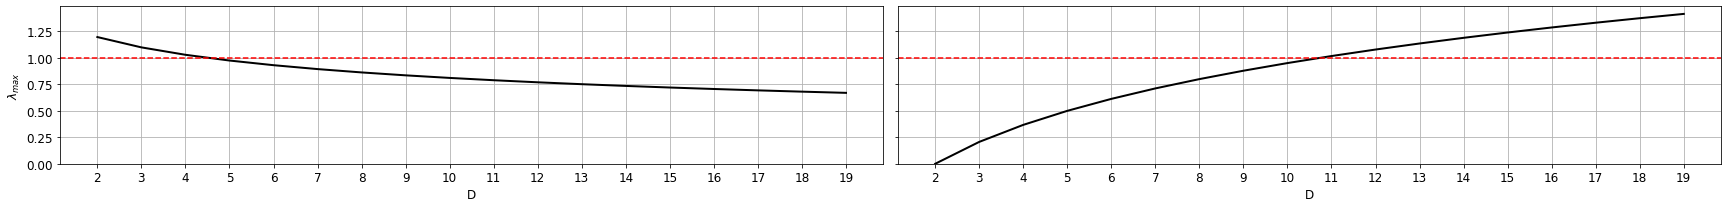

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(24, 3), tight_layout=True, sharey=True)

axs[0].plot(DS, lam_maxs_md, c='k', lw=2)
axs[0].set_ylabel(r'$\lambda_{max}$')
axs[1].plot(DS, lam_maxs_fd, c='k', lw=2)

for ax in axs:
    ax.axhline(1, ls='--', c='r')
    ax.set_ylim(bottom=0)
    ax.grid()
    set_plot(ax, x_ticks=DS, x_label='D', font_size=12)